In [11]:
from os import path
from PIL import Image
import matplotlib.pyplot as plt
import nltk
from scipy.misc import imread

In [12]:
nltk.download('punkt')
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /Users/Ruby/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
import string 

booktext=[]  
with open ("/Users/Ruby/Desktop/project5/data/lyrics/Cats.txt","r") as f:
    line=f.readlines()     
for sent in line:
    booktext.append(sent.lower().decode("utf8"))
    
for i in range(len(booktext)):
    for c in string.punctuation:
        booktext[i]= booktext[i].replace(c," ")

In [20]:
from stop_words import get_stop_words

stop_words = get_stop_words('en')
stop_words = get_stop_words('english')
print(stop_words)

[u'a', u'about', u'above', u'after', u'again', u'against', u'all', u'am', u'an', u'and', u'any', u'are', u"aren't", u'as', u'at', u'be', u'because', u'been', u'before', u'being', u'below', u'between', u'both', u'but', u'by', u"can't", u'cannot', u'could', u"couldn't", u'did', u"didn't", u'do', u'does', u"doesn't", u'doing', u"don't", u'down', u'during', u'each', u'few', u'for', u'from', u'further', u'had', u"hadn't", u'has', u"hasn't", u'have', u"haven't", u'having', u'he', u"he'd", u"he'll", u"he's", u'her', u'here', u"here's", u'hers', u'herself', u'him', u'himself', u'his', u'how', u"how's", u'i', u"i'd", u"i'll", u"i'm", u"i've", u'if', u'in', u'into', u'is', u"isn't", u'it', u"it's", u'its', u'itself', u"let's", u'me', u'more', u'most', u"mustn't", u'my', u'myself', u'no', u'nor', u'not', u'of', u'off', u'on', u'once', u'only', u'or', u'other', u'ought', u'our', u'ours', u'ourselves', u'out', u'over', u'own', u'same', u"shan't", u'she', u"she'd", u"she'll", u"she's", u'should', u"

In [21]:
script_noStop = []

for sent in booktext:
    words = sent.split()
    if not words in ([], ['']):
        sen = " ".join([w for w in words if not w in stop_words])
        # print([sen])
        script_noStop.append(sen)

script_noStop = "\n".join(script_noStop)

In [22]:
with open("/Users/Ruby/Desktop/project5/data/lyrics/Cats_noStop.txt", "wb") as f:
    f.write(script_noStop.encode("utf8"))

In [23]:
text = open(path.join( "/Users/Ruby/Desktop/project5/data/lyrics/Cats_noStop.txt")).read()

In [24]:
cat = imread(path.join("/Users/Ruby/Desktop/cat.jpg"))
image_colors = ImageColorGenerator(cat)

In [25]:
wc = WordCloud(background_color="white", max_words=2000, mask=cat,ranks_only=True)
# generate word cloud
wc.generate(text)

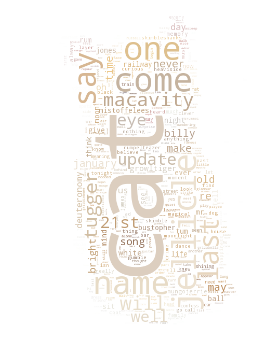

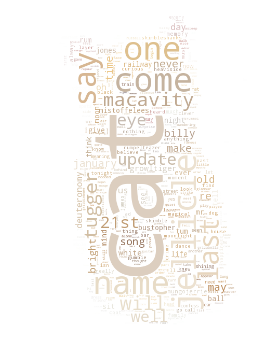

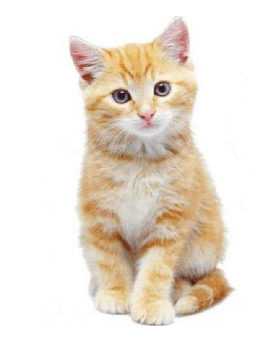

In [27]:
wc.to_file(path.join( "/Users/Ruby/Desktop/cat_cloud.png"))

# show
plt.imshow(wc.recolor(color_func=image_colors))
plt.axis("off")
plt.figure()
plt.imshow(cat, cmap=plt.cm.gray)
plt.axis("off")
plt.show()